# Crowded pedestrian detection
## Group name: Random

## Introduction:
The aim of this project is to enhance the performance of YOLOv5 in detecting crowds of people. Pedestrian detection is crucial for autonomous vehicles, allowing them to ensure pedestrian safety, avoid accidents, and navigate around obstacles. However, it faces challenges like occlusion, deformation, and low-quality images.

## Motivation:
This project is driven by the significance of crowd detection and the obstacles present in current object detection algorithms, when applied in crowded environments. Despite YOLOv5's reputation for real-time capabilities and robust object detection performance, it may face challenges in accurately identifying individuals within dense crowds. Consequently, the current implementation of YOLOv5 might not yield optimal outcomes for crowd detection applications.

# Problem statement

Although the YOLOv5 object detection algorithm has shown promising results in different situations, its capability to detect crowded pedestrians is not optimal due to challenges such as occlusions and overlapping bounding boxes. The conventional Intersection over Union (IOU) method used in YOLOv5's Non-Maximum Suppression (NMS) step does not consider the spatial relationships between bounding boxes, leading to inaccurate filtering of detections in dense scenes. The absence of distance-based information in the IOU computation further contributes to imprecise bounding box suppression, particularly when multiple objects densely occupy the image.

Here we use the CrowdHuman dataset, containing 15000, 4370, 5000, training, validation, and testing images respectively. See report for reference or https://www.crowdhuman.org/

# Setup

In [ ]:
# you may need extra cudatoolkit package for training on GPU
%pip install -r requirements.txt

In [2]:
import torch

## (Optional) Setup

#### Warning: Downloads quite a large dataset, not recommended
#### Only needs to be run for reproducibility

In [3]:
import subprocess
#subprocess.call(['./CrowdHuman2YOLO/prepare_data.sh 608x608']) # Uncomment to download data (15GB)

Data will now be stored in the subdirectory `CrowdHuman2YOLO/crowdhuman608x608`

Then move this directory inside the `/data/` directory

## Annotation for YOLO

The .txt label files for YOLO are organized in a specific format, where each line represents an annotation for an object.
This is based on the information in the annotations and is already completed via script prior to training, which is necessary for the YOLO algorithm.
0 represents `head`, 1 represents `person`.
Center Coordinates: These contain the coordinates (x, y) of the center of the object's bounding box. These coordinates are relative to the width and height of the image, so the values are between 0 and 1.
Width and Height: These are the width and height of the object's bounding box, which are also relative to the width and height of the image, so the values are also between 0 and 1.

#### See `data/crowdhuman.yaml` for more details

# (Very Optional) Training

#### **Warning: Quite time intensive**

##### weights are stored in `runs/exp/weights`

##### defaults to training on cpu, add the arg `--device 0` for gpu training

In [ ]:
# uncomment to train DIoU model

#%run train.py --data crowdhuman.yaml --cfg yolov5n.yaml --img 608 --batch-size 16

To train with default IoU instead of DIoU, replace `utils/general.py` with `utils/general_IoU.py` and run

Below are the results for our training using the IoU loss function, we see that the change in precision of the classifier approaches 0, justifying that 6 epochs are sufficient for training

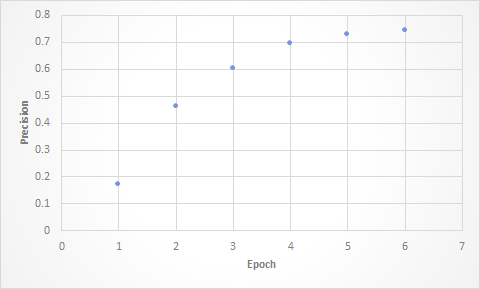

In [40]:
display(Image(filename='precision.png', width=500))

# Detect using our trained weights

We have a sample directory called `sample_test` that contains a few images taken from the test set of the CrowdHuman dataset stored locally. This is used for visualisation and detection purposes.

Here we use use the default IoU implementation.

In [4]:
# IoU detection
%run detect.py --weights yolov5n_crowdhuman_img608_IoU.pt --source sample_test/

WARNING  'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING  'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

detect: weights=['yolov5n_crowdhuman_img608_IoU.pt'], source=sample_test/, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv

# Visualisation

In [5]:
from IPython.display import Image, display
import os

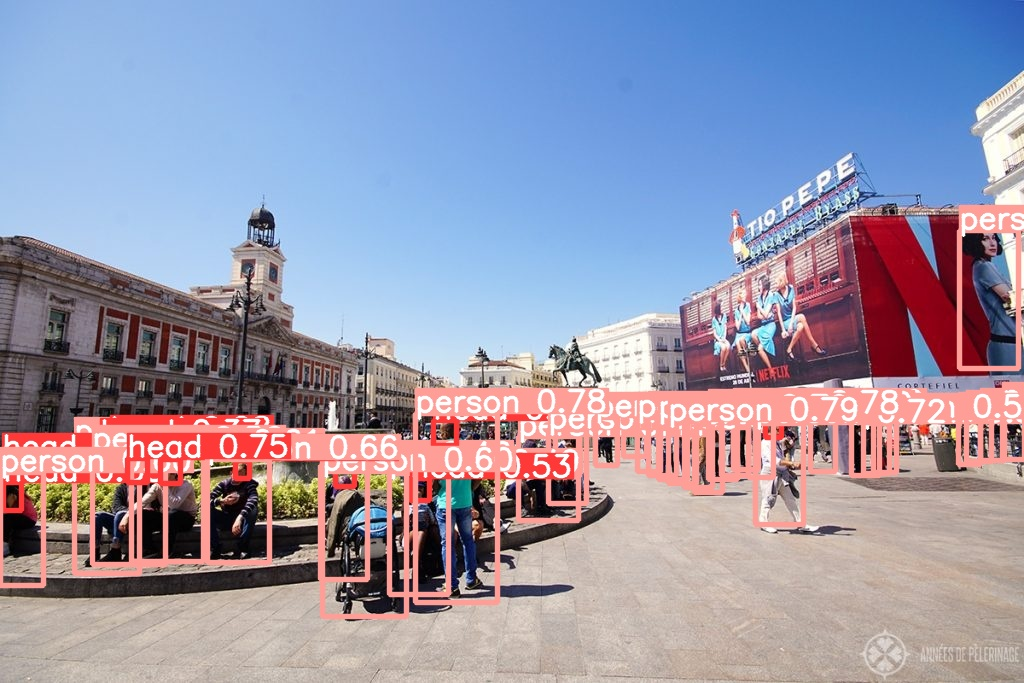

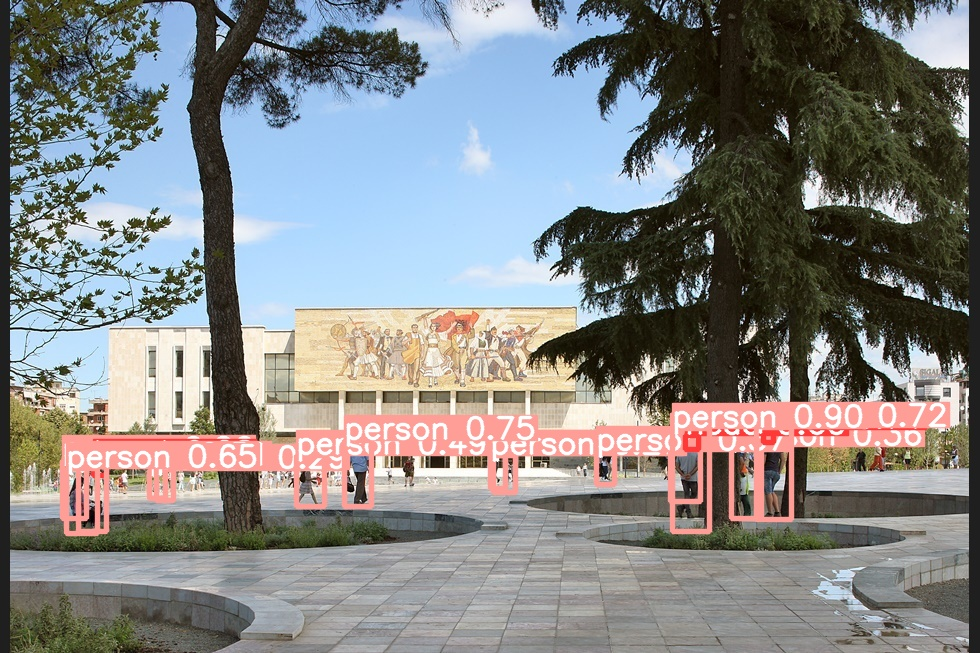

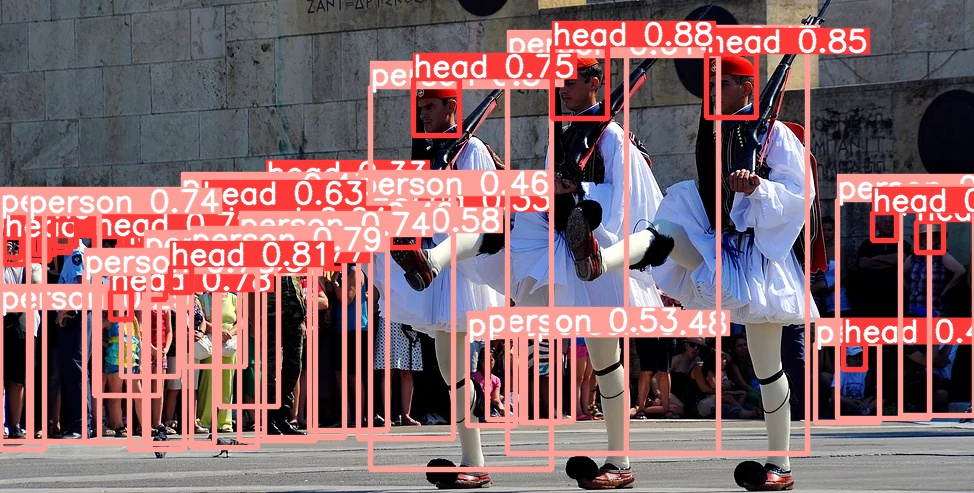

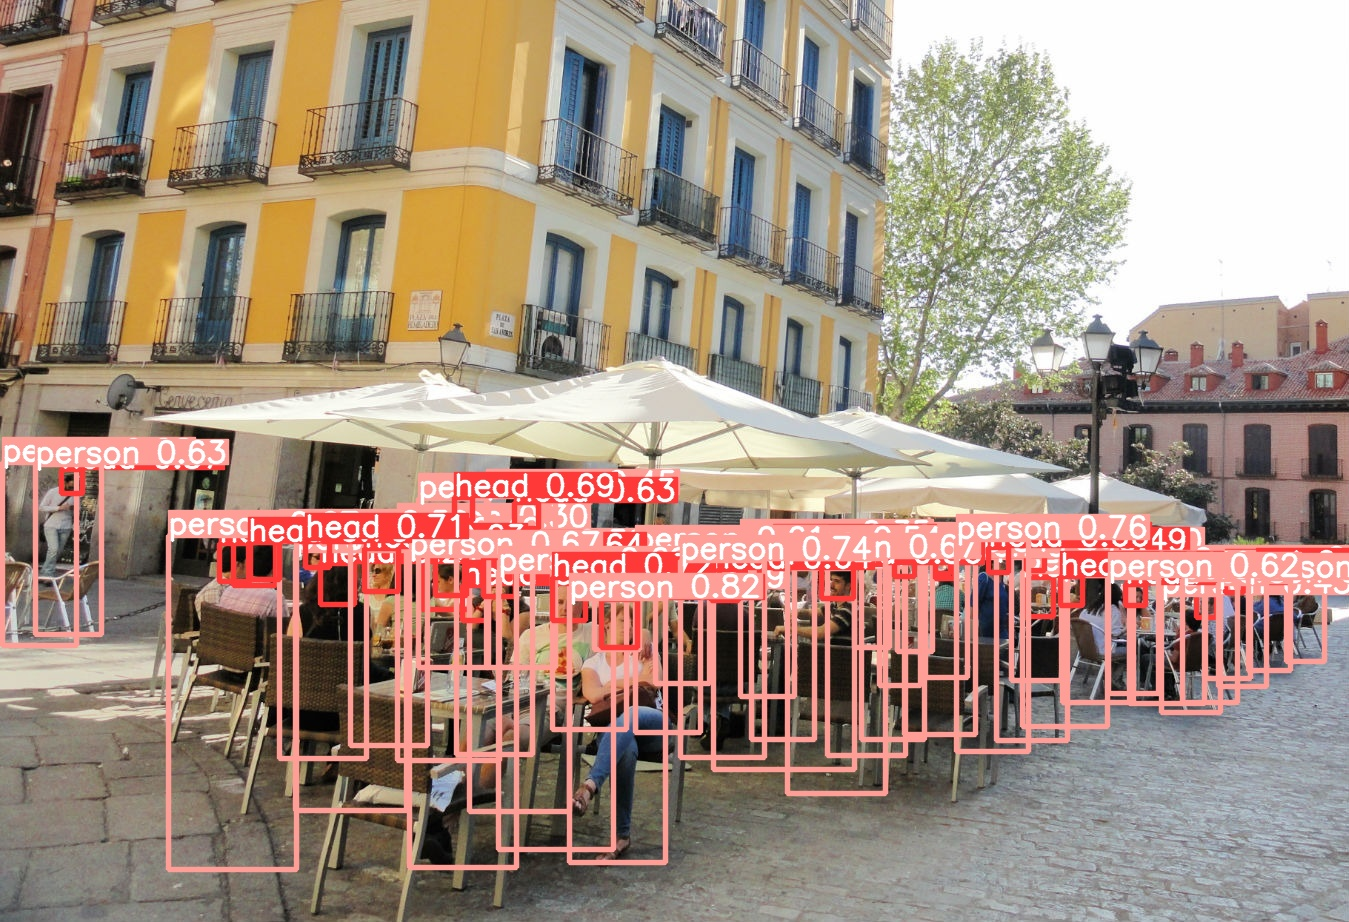

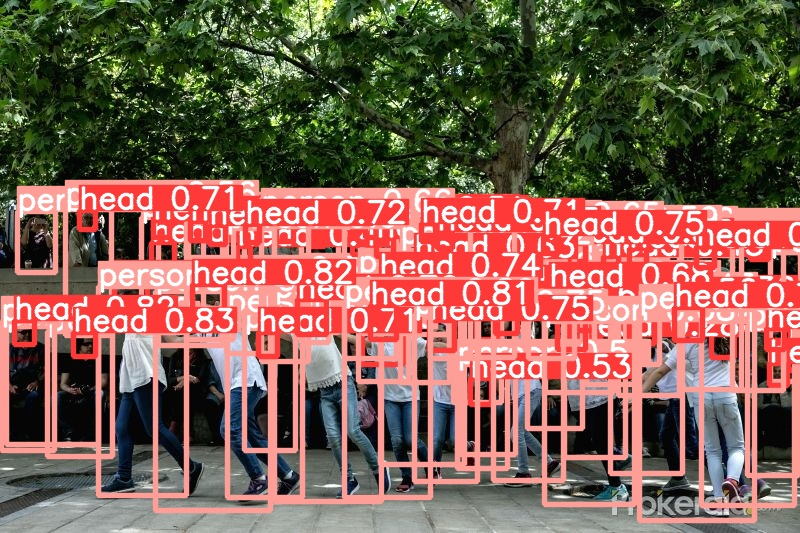

In [6]:
# EDIT THE PATHNAME FOR THE RUN YOU WANT SPECIFIED BY THE OUTPUT OF DETECT.PY
pathname = '/runs/detect/exp/'
for file in os.listdir(os.getcwd() + pathname)[:5]:
    filename = os.fsdecode(file)
    if filename.endswith(".jpg"):
        display(Image(filename='runs/detect/exp/' + filename, width=450))

Now we use the model trained with the DIoU implementation.

In the `utils/general.py`, we replaced the `torchvision.ops.nms` with our own `nms` function. Instead of calculating the IOU for the nms, we used the bbox_iou function to calculating the DIOU, which not only considers the overlapping area of two bonding boxes, but also takes into account their spatial distance.  In 'bbox_iou', after computing the standard IoU between a single bounding box (box1) and multiple bounding boxes (boxes) for variable 'inter', the diagonal squared distance between the bounding boxes' enclosing convex shapes is computed and used to adjust the IoU for variable 'rho_squared ', which penalizes boxes that are further apart from each other. 

In [7]:
# DIoU detection
%run detect.py --weights yolov5n_crowdhuman_img608_DIoU.pt --source sample_test/

detect: weights=['yolov5n_crowdhuman_img608_DIoU.pt'], source=sample_test/, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  2023-8-1 Python-3.11.3 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 1761871 parameters, 0 gradients
image 1/18 D:\Documents\COMP9444\project\yolov5-new\sample_test\1066405,1b8000ef60354f.jpg: 448x640 8 heads, 34 persons, 60.0ms
image 2/18 D:\Documents\COMP9444\project\yolov5-new\sample_test\1066405,2a72f000f214d26a.jpg: 448x640 2 heads, 11 persons, 76.0ms
image 3/18 D:\Documents\COMP9444\project\yolov5-new\sample_test\1066405,2ac2400079a6d80f.jpg: 352x640 27 heads, 17 persons, 53.0ms
image 4/18 

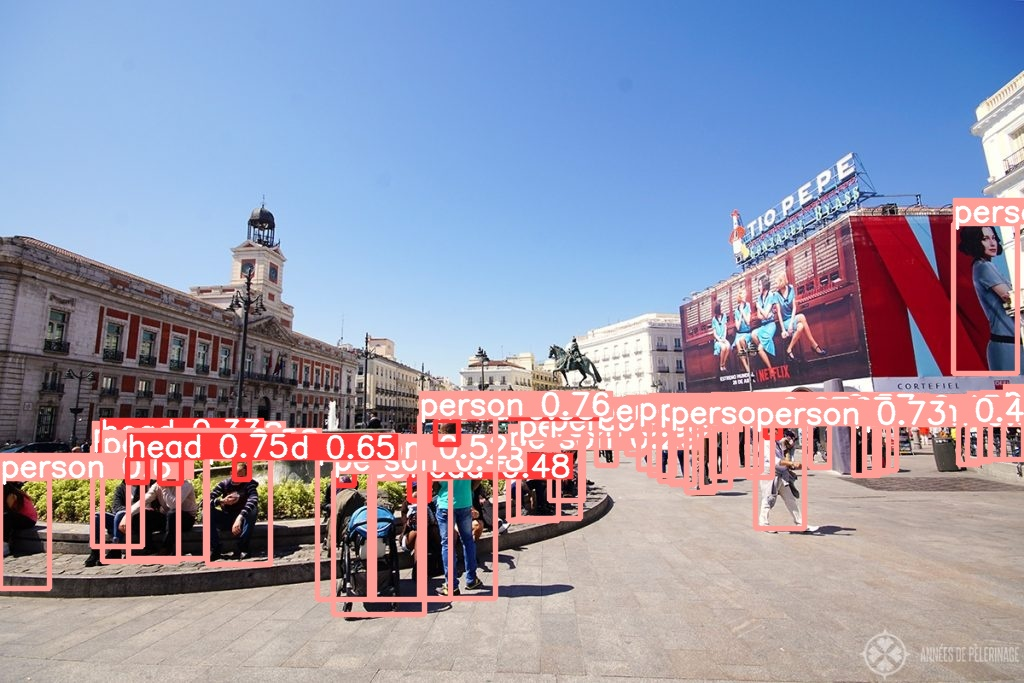

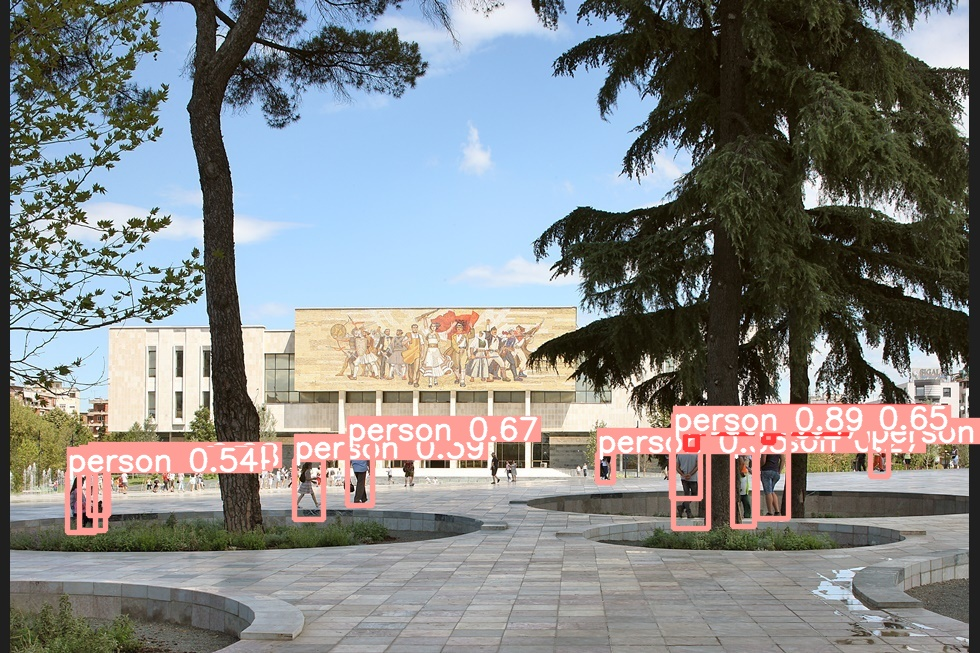

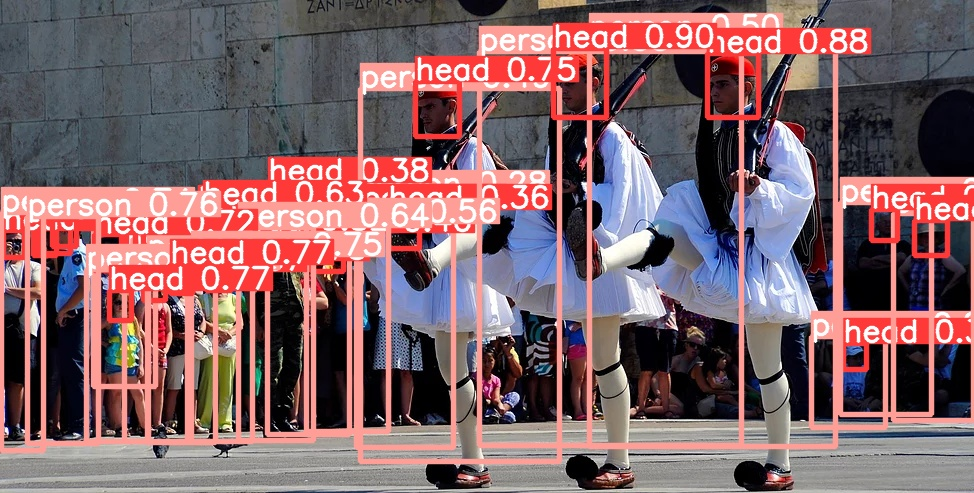

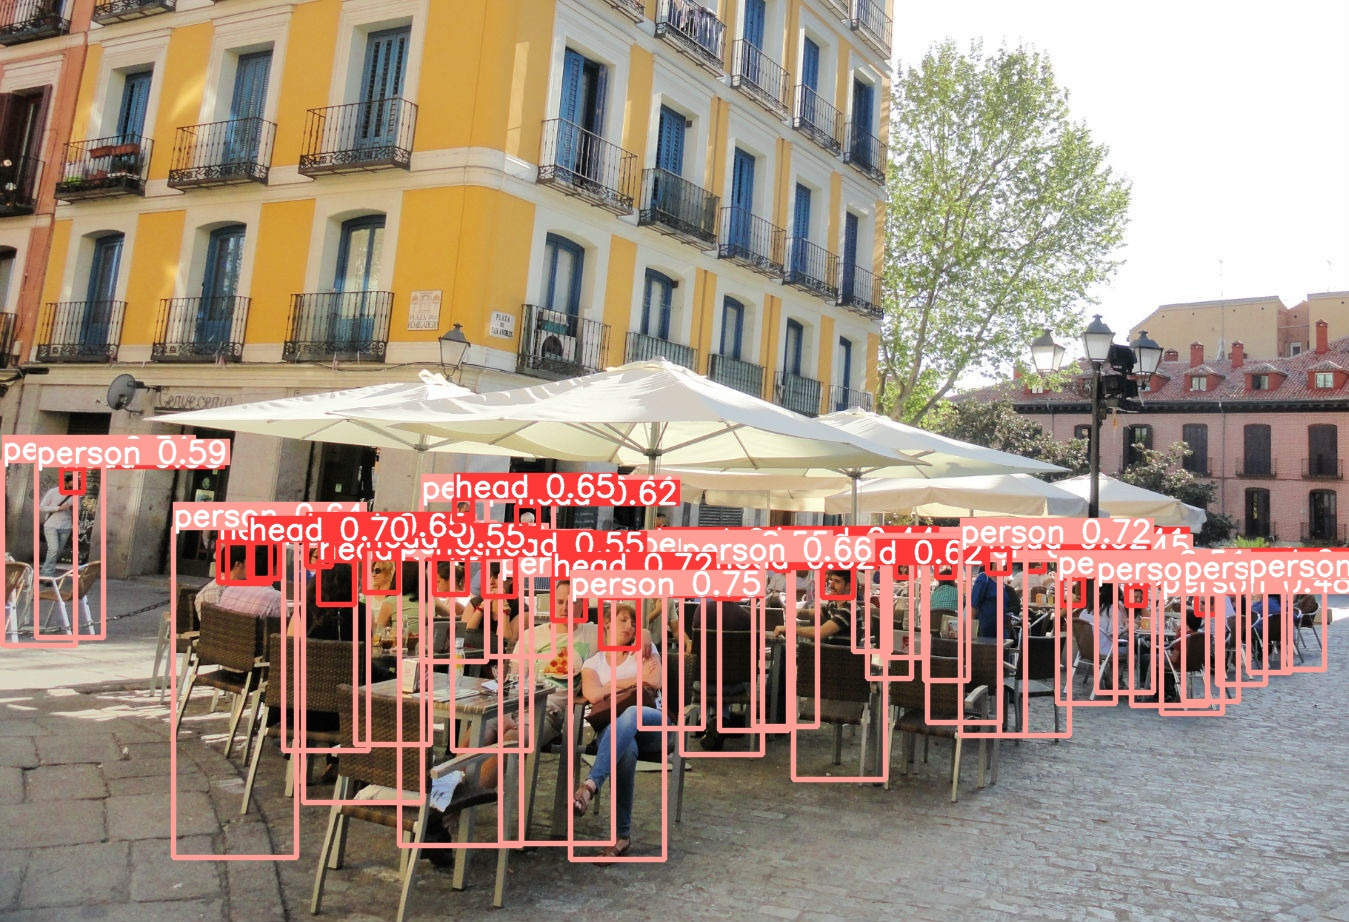

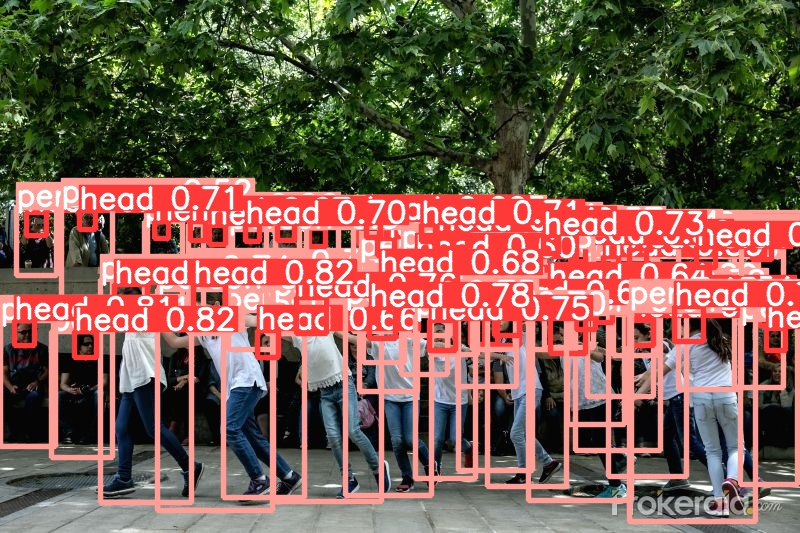

In [8]:
# EDIT THE PATHNAME FOR THE RUN YOU WANT SPECIFIED BY THE OUTPUT OF DETECT.PY
pathname = '/runs/detect/exp/'
for file in os.listdir(os.getcwd() + pathname)[:5]:
    filename = os.fsdecode(file)
    if filename.endswith(".jpg"):
        display(Image(filename='runs/detect/exp2/' + filename, width=450))

## Validation

The cell below demonstrates how to run validation for the trained models

In [ ]:
# uncomment below to run validation for IoU
#%run val.py --weights yolov5n_crowdhuman_img608_IoU.pt --data crowdhuman.yaml --img 608

# uncomment below to run validation for DIoU
#%run val.py --weights yolov5n_crowdhuman_img608_DIoU.pt --data crowdhuman.yaml --img 608

# Results

Tabulated below are the results after training 6 epochs with IoU and DIoU loss functions.

| X | Precision #  | Recall    |
|---:|:-------------|:-----------|
| IoU Loss Function  | 0.74336  | 0.52677       |
| DIoU Loss function | 0.6749  | 0.34062      |

Unfortunately, the DIoU loss function does not achieve the same precision and recall as the IoU loss function for the CrowdHuman dataset using the parameters specified earlier, despite being more computationally demanding.

# Discussion

A limitation of the DIOU metric in  pedestrian detection is its reduced ability to detect individuals positioned far from the group due to its sensitivity to distance. It tends to prioritize targets with higher spatial overlap and closer distances within the group, potentially overlooking is olated individuals farther away. 

The other major limitation is the computational overhead the DIoU algorithm induces, which is significant when compared with the IoU loss function. When computing DIOU in crowded scenarios, there is substantial increases in processing time. Due to the complex computations involved in assessing the distance and intersection over union between each pair of predicted and actual boxes. Especially in  crowded scenes, where the number of objects is high and their interactions are intricate, these complexities result in a significant surge in computational workload, ultimately leading to prolonged processing times, with images exceeding even 20.5s of DIoU computation time.

# Conclusion

Unfortunately, the YOLOv5n model using a DIoU based loss function did not perform as hypothesised, but this may be due to the lack of hyperparameter optimisation due to time and hardware constraints. 

Also, whilst the YOLOv5n model is relatively simple, it did not offset the computational intensity significantly to train the model with the DIoU loss function. This limitation is partially due to hardware constraints, but also must be attributed to an increased computational overhead.

## Optimisation, and future work

In the future, we would try to optimise the distance threshold of the DIoU loss function, but would need a significantly more lightweight model to do so. Here we have studied the following approach using a GhostNet architecture in the backbone of the YOLOv5 model. Which was inspired by a research article “[1911.11907] GhostNet: More Features from Cheap Operations.” Accessed August 4, 2023. https://arxiv.org/abs/1911.11907.

#### Motivation

Smaller and faster models require less computing resources and power consumption making them better for embedded and mobile applications. And Improved efficiency also enables real-time performance on less powerful hardware like single-board computers.Therefore, my improvement idea for YOLO v5 is to make it more lightweight

#### Methodology

In short, we can make the YOLOv5 architecture more efficient by:

    1. Replacing the traditional convolution, BatchNormalization, and LeakyRelu modules in the backbone section with GhostBottleNeck 
    
    2. Using TCSP Ghost2 replaces the C3 module in the backbone section 
    
    3. Replacing the C3 and Conv module in the head section with GSCONV and VoVGSCSP
    
We demonstrate the difference of the two architectures below:

In [16]:
# Default YOLOv5s architecture
with open("models/yolov5s.yaml") as f: # The with keyword automatically closes the file when you are done
    print(f.read())

# YOLOv5 ðŸš€ by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, 

In [18]:
# Modified YOLOv5s architecture
with open("models/yolov5sghost.yaml") as f: # The with keyword automatically closes the file when you are done
    print(f.read())

# YOLOv5 ðŸš€ by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
   [-1, 1, GhostBottleneck, [128, 3, 2]],  #0 320

   [-1, 1, GhostBottleneck, [128, 3, 2]],  # 1-P2/4
   [-1, 3, TCSP_Ghost2, [128]],

   [-1, 1, GhostBottleneck, [256, 3, 2]],  # 3-P3/8
   [-1, 6, TCSP_Ghost2, [256]],

   [-1, 1, GhostBottleneck, [512, 3, 2]],  # 5-P4/16
   [-1, 9, TCSP_Ghost2, [512]],

   [-1, 1, GhostBottleneck, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, TCSP_Ghost2, [1024]],

   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, GSConv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, VoVGSCSP, [512, False]],  # 13


#### Results

The GhostBottleneck replacements are shown to improve performance both quantitatively and computationally for classification using YOLOv5 architecture and demonstrated in the paper linked above. The weight file size of the original Yolo v5s model was 13.7MB, but after improvement, it was only 7.54MB.

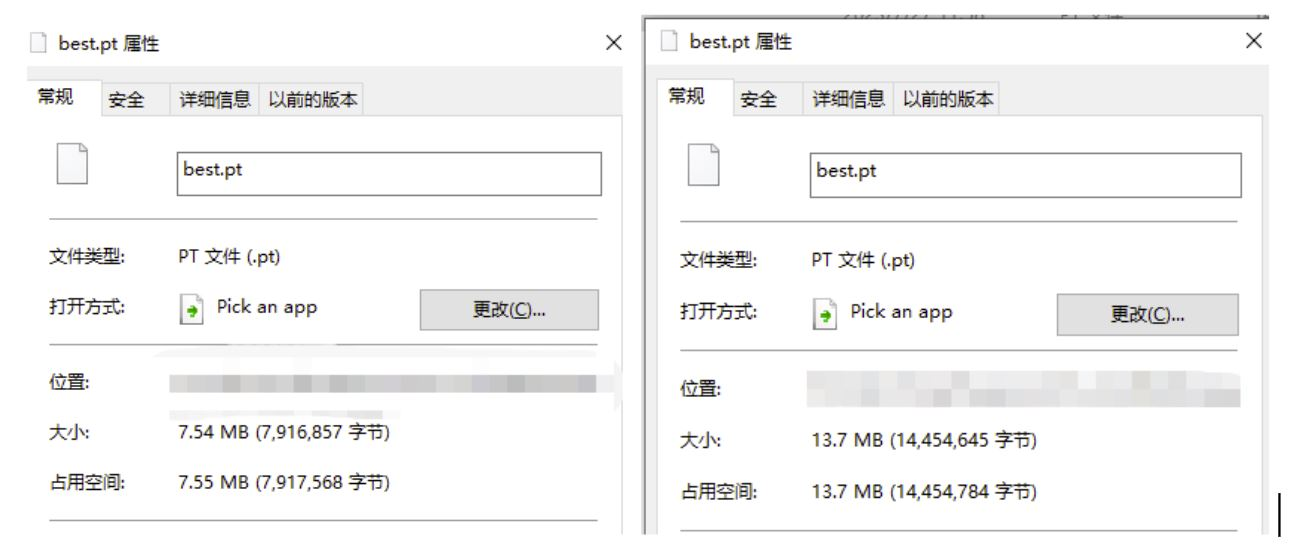

In [20]:
display(Image(filename='filesize.JPG', width=700))

We can also see that using the GhostNet architecture has higher accuracy in some images than the Yolo v5s model, and can label the missing characters in the Yolo v5s model. As demonstrated in the images below, with the left image using GhostNet, and the right using the default architecture.

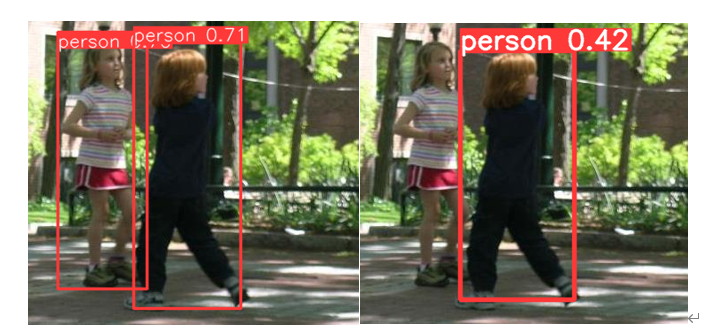

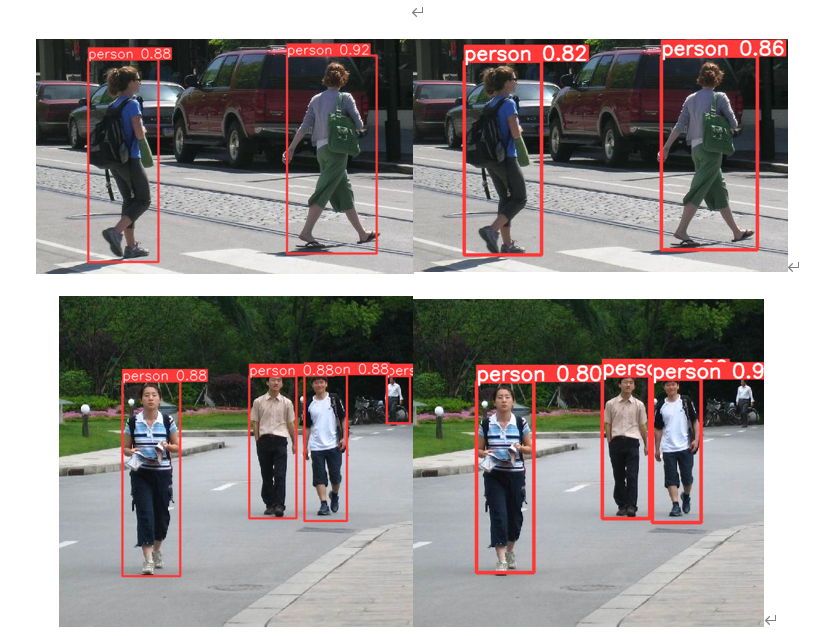

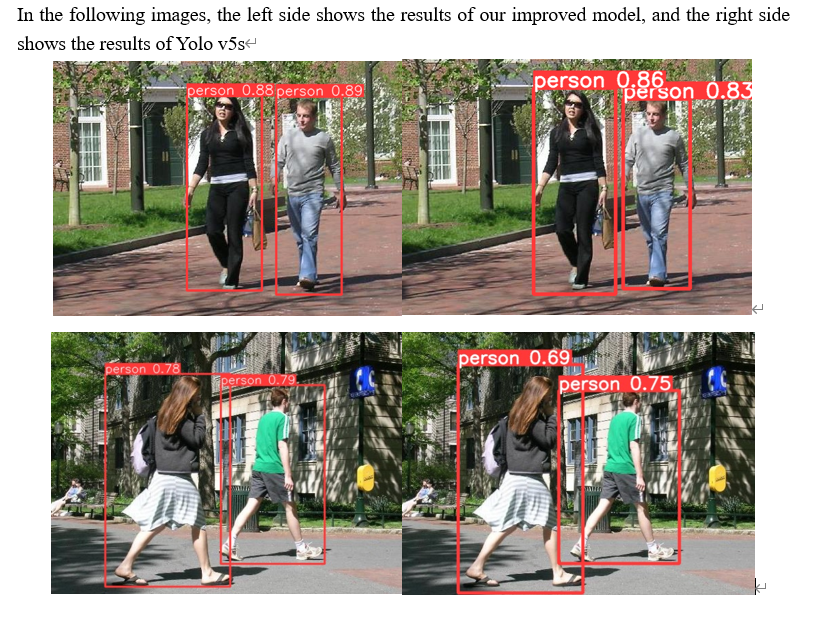

In [21]:
for i in range(1,4):
    display(Image(filename=f'ghostvsnormal{i}.jpg', width=400))

#### Discussion

First of all, because our improvement is mainly lightweight, the improved model may have the problem of upper accuracy limit in some scenarios where the demand for lightweight is not high. Secondly, we use the default CIOU loss, and we can use a better Loss function in future work to optimize model convergence and performance. 

In the future we would retrain our DIoU and IoU based Yolov5n models using these changes, however, due to hardware and time constrains this was just not possible in the scope of this project.